### Pipeline demo notebook

#### Split Mnist task

In [1]:
import sys
sys.path.append("..")
from frcl.experiments.pipeline import BaselineTrainDemo, FRCLTrainDemo
from frcl.tasks import SplitMnistTask, PermutedMnistTask
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
task = SplitMnistTask()
frcl_pipeline = FRCLTrainDemo(task, n_repeat=1, device='cpu', n_epochs=4, lr=1e-5, batch_size=100, n_inducing=10, n_classes=2)
baseline_pipeline = BaselineTrainDemo(task, n_repeat=1, device='cpu', n_epochs=4, lr=1e-5, batch_size=100, n_inducing=10, n_classes=2)

/content/frcl/experiments/pipeline.py:64: UserWarning: n_classes option not supported now
  warnings.warn("n_classes option not supported now")


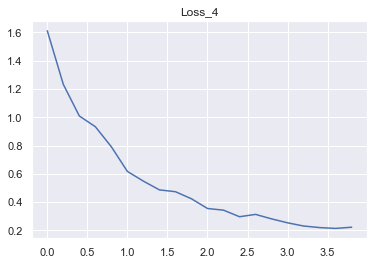

In [ ]:
frcl_res = frcl_pipeline.run()

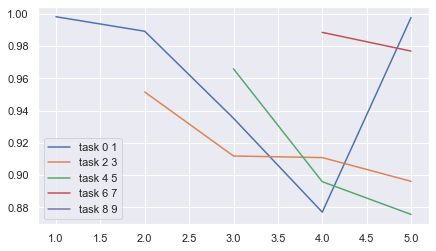

In [ ]:
tasks = [(0, 1), (2, 3), (4 ,5), (6, 7), (8, 9)]

fig = plt.figure(figsize=(7, 4))
for i, lbls in enumerate(tasks):
    lbl0, lbl1 = lbls
    x, y = frcl_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {} {}".format(lbl0, lbl1))
    plt.legend()
plt.show()

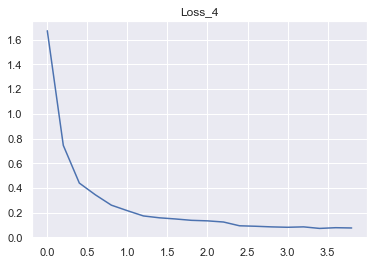

In [ ]:
baseline_res = baseline_pipeline.run()

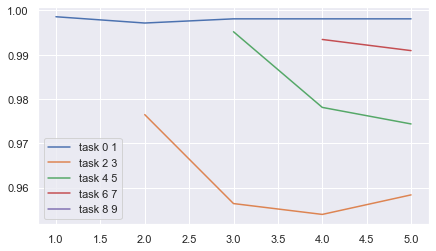

In [ ]:
tasks = [(0, 1), (2, 3), (4 ,5), (6, 7), (8, 9)]

fig = plt.figure(figsize=(7, 4))
for i, lbls in enumerate(tasks):
    lbl0, lbl1 = lbls
    x, y = baseline_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {} {}".format(lbl0, lbl1))
    plt.legend()
plt.show()

#### Permuted Mnist task

In [ ]:
n_tasks = 10
task = PermutedMnistTask(n_tasks)
baseline_pipeline = BaselineTrainDemo(task, n_repeat=1, device='cuda', n_epochs=10, lr=1e-5, batch_size=100, n_inducing=10, n_classes=10)

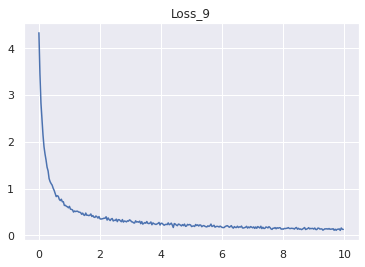

/content/frcl/frcl.py:106: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  distr = self.pred_func(torch.matmul(self.base(x), omega.T).squeeze())


In [ ]:
baseline_res = baseline_pipeline.run()

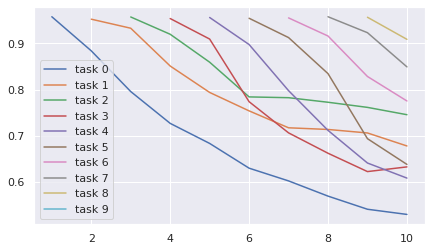

In [ ]:
fig = plt.figure(figsize=(7, 4))
for i in range(n_tasks):
    x, y = baseline_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {}".format(i))
    plt.legend()
plt.show()

In [ ]:
n_tasks = 10
task = PermutedMnistTask(n_tasks)
frcl_pipeline = FRCLTrainDemo(task, n_repeat=1, device='cuda',
                              n_epochs=4, lr=1e-4, batch_size=64, n_inducing=100, n_classes=10)

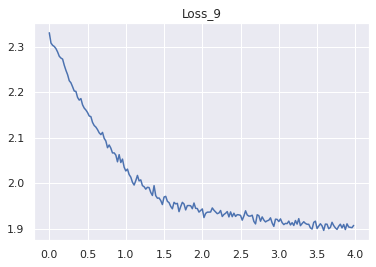

../frcl/frcl.py:317: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predicted += self.pred_func(torch.stack(sample, axis=1))


In [ ]:
frcl_res = frcl_pipeline.run()

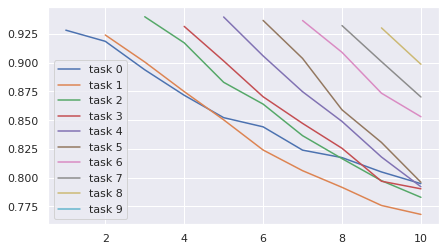

In [ ]:
fig = plt.figure(figsize=(7, 4))

Y = []
for i in range(n_tasks):
    x, y = frcl_res[0][0].get_task_estimations(i)
    Y.append(y)
    plt.plot(x, y, label = "task {}".format(i))
    plt.legend()
plt.savefig("../out/plot.png")
plt.show()

In [ ]:
import numpy as np
np.mean([y[-1] for y in Y])

0.82768

#### Omniglot task

In [2]:
from frcl.experiments.pipeline import BaselineTrainDemo
from frcl.tasks import OmniglotTask

In [10]:
task = OmniglotTask(n_tasks=5)
baseline_pipeline =  BaselineTrainDemo(task, n_repeat=1, device='cuda', n_epochs=5, lr=1e-4, batch_size=32, n_inducing=10)

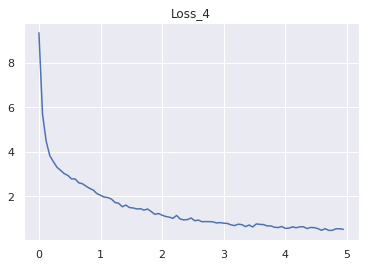

/content/frcl/frcl.py:123: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  distr = self.pred_func(torch.matmul(self.base(x), omega.T).squeeze())


In [11]:
res_baseline = baseline_pipeline.run()

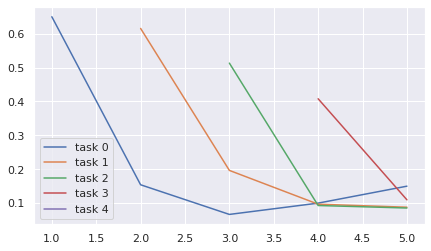

In [13]:
fig = plt.figure(figsize=(7, 4))
for i in range(5):
    x, y = res_baseline[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {}".format(i))
    plt.legend()
plt.show()

In [3]:
from frcl.experiments.pipeline import FRCLStatTrace

In [4]:
task = OmniglotTask(n_tasks=2)
frcl_pipeline =  FRCLStatTrace(task, n_repeat=1, device='cuda', n_epochs=1, lr=3*1e-5, batch_size=32, n_inducing=50)

N tasks: 2, Epoch 0


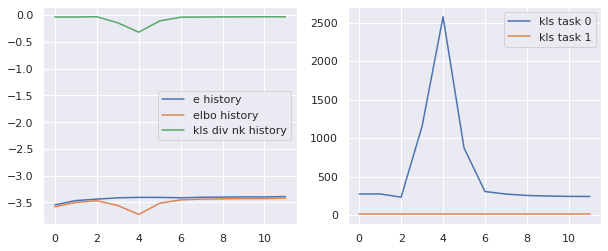

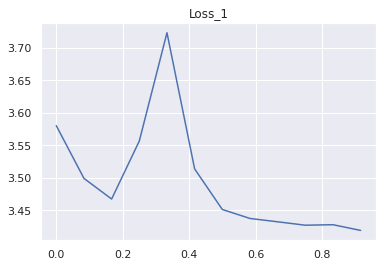

/content/frcl/frcl.py:355: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predicted += self.pred_func(torch.stack(sample, axis=1))


In [5]:
res_frcl = frcl_pipeline.run()

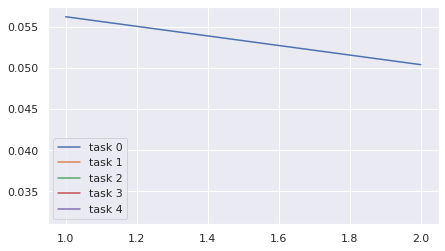

In [6]:
fig = plt.figure(figsize=(7, 4))
for i in range(5):
    x, y = res_frcl[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {}".format(i))
    plt.legend()
plt.show()